# Brooklyn DATA -  LSTM - Multi-Step Forecast - Vector Output Model


## Here I have done the following:

1. Followed steps from this website:
[https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/)

2. Import necessary modules

3. Fixed the parameters of the code to take in input of previous 60 days and output the next 30 days
    - n_steps_in = 60
    - n_steps_out = 30
    
4. Define the model and predict 30 days of data
5. Note any observations

In [1]:
# Imports
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
#Supress default INFO logging
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import logging, sys
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('datasets/rollingsales_brooklyn.xls_prepped_bare.csv', usecols=['SALE DATE', 'SALE PRICE'])

In [3]:
df = df.dropna()
df = df.reset_index(drop=True)

In [4]:
df = df.rename(columns={'SALE DATE':'ts', 'SALE PRICE': 'y'})
df.columns = df.columns.astype(str)
df = df.set_index(['ts'], drop=True)
df.index= pd.to_datetime(df.index)

In [5]:
# df

In [6]:
df = df.resample('D').mean()
df = df.reset_index()

In [7]:
df.dropna(inplace=True)
df

,ts,y
0,2020-04-01,3.977437e+06
1,2020-04-02,8.185471e+05
2,2020-04-03,1.815030e+06
3,2020-04-04,2.333627e+05
5,2020-04-06,8.709561e+05
...,...,...
358,2021-03-25,1.216184e+06
359,2021-03-26,1.064060e+06
362,2021-03-29,1.002984e+06
363,2021-03-30,1.058857e+06


In [8]:
raw_input_test = list(df['y'])
raw_input_test
np.shape(df.index)

(293,)

## Below steps are taken from:

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [9]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = raw_input_test

# choose a number of time steps
n_steps_in, n_steps_out = 60, 30

# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)


# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=0)


In [11]:
# demonstrate prediction

x_input = array(raw_input_test[233:293])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[ 590385.8  1155466.8  1074484.5   604505.7   851659.7   779188.5
   879828.   1287739.8   958004.25 1321712.9   499302.56  899657.44
   574755.4   828553.1   830830.6   565934.25 1111574.    792225.25
   818195.7  1153846.8  1091087.4   952603.06  745391.75  642780.75
   535804.06  753693.4  1134179.8   789145.6   431517.72  695024.44]]


In [12]:
np.shape(list(yhat))

(1, 30)

In [15]:
y_hat1 = np.reshape(yhat, (30,1))
np.shape(y_hat1)

(30, 1)

In [16]:
# I increased the epochs and the predictions went higher.
x_list = list(range(1,323))

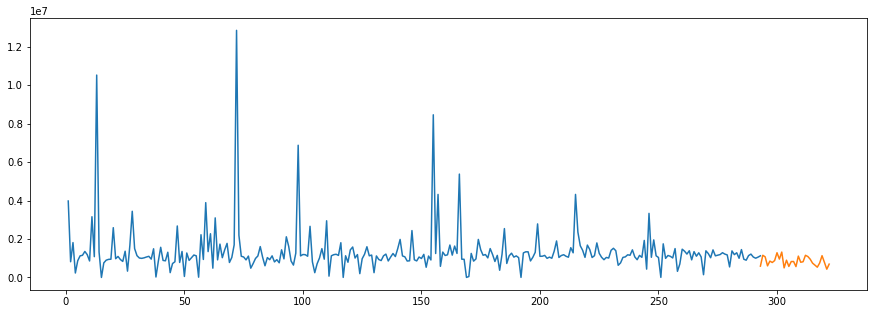

In [17]:
plt.figure(figsize=(15,5))
fig =plt.plot(x_list[0:293], df['y'][0:293])
ax = plt.plot(x_list[292:323], y_hat1)

## Observation:

Brooklyn prices are also predicted to be lower per this model.